In [2]:
import sys
sys.path.append("/export/fs04/a12/rhuang/k2/k2/python")
sys.path.append("/export/fs04/a12/rhuang/k2/build/temp.linux-x86_64-cpython-38/lib/")
sys.path.append("/export/fs04/a12/rhuang/icefall_align2/")

In [3]:
import k2
import torch
from collections import defaultdict

# %matplotlib inline

from dataclasses import dataclass

import IPython
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.figsize"] = [16.0, 4.8]

/home/rhuang/mambaforge/envs/efrat2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import sentencepiece as spm

model_file = "/export/fs04/a12/rhuang/icefall_align2/egs/librispeech/ASR/data/lang_bpe_500/bpe.model"
sp = spm.SentencePieceProcessor()
sp.load(str(model_file))

True

In [ ]:
# b 1068
# b 614
# torch.save(nnet_output.cpu().detach(), '/export/fs04/a12/rhuang/icefall_align2/egs/librispeech/ASR/ruizhe_hmm/nnet_output.pt')
# nnet_output = torch.load('/export/fs04/a12/rhuang/icefall_align2/egs/librispeech/ASR/ruizhe_hmm/nnet_output.pt')

# !import code; code.interact(local=vars())
# [c.id for c in supervisions["cut"]]
# texts

In [12]:
nnet_output = torch.load('/export/fs04/a12/rhuang/icefall_align2/egs/librispeech/ASR/ruizhe_hmm/nnet_output_hmm.pt')
# nnet_output = torch.load('/export/fs04/a12/rhuang/icefall_align2/egs/librispeech/ASR/ruizhe_hmm/nnet_output_ctc.pt')
texts = ['WHAT HAS BECOME OF YOUR THREE COMPANIONS', 'THE PEACE OF RIGHTEOUSNESS', 'STEPPING OUT OF HIS HIDING PLACE', 'HERE THEY TOOK UP THE VIGIL', 'DID YOU SEE HIM AT THAT TIME', 'HE LIKED TO BE CALLED HONEST JIM', 'IS THE MIDDLE OF ALL THE WORDS', 'TOO CROWDED THAT IS THE WORST', 'NEXT AN ENGLISHMAN OF RANK', 'I DO NOT BELIEVE HE WAS', 'BILL GREGG SMILED SOURLY', 'FARMERS ALSO DRINK HOMEMADE CIDER', 'A FELLER COULD GET ENOUGH OF THEM TO MAKE A SHOWING', 'THE SEVENTH CHAPTER', 'THE CHILD TURNED BACK', 'TO BID MY WIFE AND CHILDREN ADIEU AND', 'TO SEE WHAT HIS COMRADE WAS ABOUT', 'HE LOVED TO HAVE THE CLOTH LAID', 'AND SO MIGHT MARRY AGAIN WHEN HE WOULD', 'AND SO LEFT HIM BOUND WITH ROPES', 'AND CAROUSE WITH ME THIS NIGHT', 'THE INCOME WAS ALREADY HIS OWN', 'AND THEY BURIED HIM IN THE CITY OF DAVID', 'THE WHOLE OF THIS ITINERARY', 'BLOCKING THE WAY TO SANTIAGO', 'AND THEY REFRESHED THEMSELVES TOGETHER', 'GOOD GOD HE MUTTERED AND READ ON', "SAINT JAMES'S SEVEN", 'THINKIN UP NEW WAYS OF RAISIN HELL', 'AND THE TWO WILL PASS OFF TOGETHER', 'THE SKY WAS CLEAR BLUE', 'PRAY ARE YOU ON A PLEASURE VOYAGE', 'IN THE MIDST OF POVERTY AND WANT', 'WITH BILLOWS OF DUST AND SAND', 'BUT MORE WAS TO COME WHEN', 'OH YES HE IS OLD MAN', 'AND LONGITUDE SEVENTEEN DEGREES', 'AND FORCE THE HAND OF THE GOVERNMENT', 'THE OFFICIATING PRIEST THE BEADLE', 'THIS WOULD BE RECKLESS EXTRAVAGANCE', 'THEN SAID THE FIRST SOLDIER', 'OF THE ESTATE DURING HER LIFETIME', 'AND TOUCHED HER PRIDE MAYBE TOO', 'KNIT TWO TOGETHER TWICE', "THE DEVIL SAID D'ARTAGNAN", "PROTESTED THE MAN AT OB HAHN'S SIDE", 'SUCH NOTABLES AS SAINTE MAURE', 'PERHAPS SO SAID POLLY', 'BUT THE MAGPIE IN THE TREE WHO LIKE', 'KNIT TWO TOGETHER TWICE', 'THE SILVER ON THE FLOOR WAS SCATTERED', "YOU MIGHT WONDER WHY I DIDN'T", 'THAT WAS ONE DEGREE GAINED', 'BUT I COULD NOT WAIT THERE FOR THEM', 'AND TO LEAD HIM TO BETHULIA', 'HE COULD GET NO FURTHER', "I CAN'T IMAGINE NOT BEING ABLE TO", 'HE GOT HIMSELF TO THE DOOR', 'MISSUS L H HORNSBY', 'WHEN SHE HAD DONE SPEAKING', 'YOU OUGHT TO BE VERY CONTENTED SIR', 'I OBSERVED THIS ALSO', 'AT ONE OF THE OPEN WINDOWS', 'WHEN ASHUR NATSIR PAL THE THIRD', 'HERE THEY TOOK UP THE VIGIL', 'THERE MUST BE ALL SORTS IN THE WORLD', 'MY VIEWS WERE IN DEMAND', 'LOOKED AWAY AS SOON AS POSSIBLE', 'THE INCOME WAS ALREADY HIS OWN', 'WRITTEN IN THE ANNALS OF JAPAN', 'TOO MUCH SAID MISTER POSTMAN', "SAINT JAMES'S SEVEN", 'OH YES HE IS OLD MAN', 'IN WHOSE SERVICE HE HAD A RELATIVE', 'BUT I AM QUAITE APPY', 'THE STORY OF THE GRECIAN KING', 'BUT TO MY EXTREME WONDER', 'WITH BILLOWS OF DUST AND SAND', 'AND STAYED THERE FOR THIRTY DAYS', "YOU MIGHT WONDER WHY I DIDN'T", 'WHEN THE REJOICINGS WERE OVER', 'FOR LOVE I HAVE HEARD SAY', 'THE OFFICIATING PRIEST THE BEADLE', 'HOWEVER I SHOOK THEM OFF', 'THE INSTANT HE MADE A STEP FARTHER', 'PRAWN SOUP', "I DON'T MIND I'M GLAD YOU'RE OUT OF IT", 'MY VIEWS WERE IN DEMAND', 'NORTHANGER ABBEY', 'HE TECK DAT TIME TOO', 'MISSUS L H HORNSBY', 'BUT I AM QUAITE APPY', 'I REPLIED', 'EASY GOING']
cids = ['7113-86041-0020-916_sp1.1', '211-122442-0067-15801_sp1.1', '233-155990-0000-18081', '27-124992-0064-5838_sp1.1', '5808-48608-0002-15593_sp1.1', '5463-39173-0003-360', '328-129766-0000-9314_sp1.1', '39-121916-0025-6519_sp1.1', '6078-54013-0026-3246_sp1.1', '1235-135883-0025-21446_sp1.1', '6209-34601-0009-14691', '27-124992-0073-5847_sp1.1', '5049-25947-0001-12628_sp1.1', '6531-61334-0060-1780', '887-123290-0030-1333_sp1.1', '4680-16041-0021-6127_sp1.1', '2136-5143-0030-2848', '839-130898-0097-28221_sp1.1', '2436-2476-0015-23600', '2911-12359-0008-11552_sp1.1', '5163-18515-0002-9472_sp1.1', '27-124992-0062-5836_sp1.1', '3830-12535-0019-4027_sp1.1', '1737-146161-0009-22983_sp1.1', '3982-178459-0049-23084', '7190-90543-0013-18434_sp1.1', '7113-86041-0084-980_sp1.1', '405-130894-0051-27944_sp1.1', '8629-261139-0007-6282_sp1.1', '3982-178459-0066-23101_sp1.1', '2764-36616-0011-13219', '2989-138028-0005-24107_sp1.1', '1867-154071-0002-4302_sp1.1', '5463-39173-0003-360_sp1.1', '26-495-0019-10284_sp1.1', '2136-5147-0012-2916', '27-124992-0026-5800_sp1.1', '4397-15666-0003-9089_sp1.1', '730-358-0062-7986_sp1.1', '1235-135887-0000-21347_sp1.1', '8063-274117-0018-20903_sp1.1', '2989-138035-0026-24204_sp1.1', '7402-90848-0062-534_sp1.1', '5456-62014-0018-23416_sp1.1', '2136-5147-0012-2916_sp1.1', '3374-298026-0040-19646_sp0.9', '1867-154071-0002-4302', '1970-26100-0022-11340_sp1.1', '403-126855-0000-19222_sp0.9', '460-172359-0090-347_sp1.1', '2911-12359-0024-11568_sp1.1', '1867-154071-0036-4336_sp1.1', '8747-293952-0020-26038_sp1.1', '6019-3185-0028-1403_sp1.1', '250-142286-0025-7263', '5390-24512-0042-25093_sp1.1', '1246-124548-0020-8409_sp1.1', '1963-147036-0035-10068_sp1.1', '26-495-0019-10284', '1867-148436-0040-4294_sp1.1', '211-122425-0059-15711_sp1.1', '7511-102419-0003-2135', '4051-11217-0010-3724_sp1.1', '730-359-0030-8064_sp1.1', '4397-15666-0003-9089', '211-122442-0057-15791_sp1.1', '1737-146161-0007-22981', '5339-14134-0078-16275_sp1.1', '4195-186236-0012-8739_sp1.1', '1898-145702-0017-16048_sp1.1', '1183-133256-0011-25963_sp1.1', '8063-274117-0018-20903', '3259-158083-0080-19094_sp1.1', '887-123291-0026-1286_sp1.1', '125-121342-0024-7213_sp1.1', '6531-61334-0009-1729_sp1.1', '7302-86815-0012-17145_sp1.1', '730-358-0022-7946_sp0.9', '4195-186237-0033-8677_sp1.1', '1594-135914-0032-9553_sp0.9', '3259-158083-0005-19019', '7794-295948-0026-3373_sp1.1', '5688-15787-0035-8914_sp1.1', '2136-5143-0030-2848_sp1.1', '211-122425-0046-15698_sp1.1', '328-129766-0017-9331_sp1.1', '4051-11217-0037-3751_sp1.1', '1963-142776-0027-10025_sp1.1', '118-47824-0035-1208_sp1.1', '3982-178459-0049-23084_sp1.1', '19-198-0000-24898_sp1.1', '2764-36616-0011-13219_sp1.1', '3259-158083-0005-19019_sp1.1', '1447-130550-0000-12852']

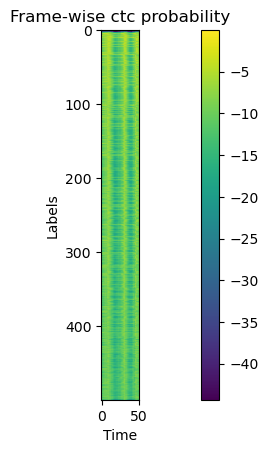

In [13]:
emission = nnet_output[0]
plt.imshow(emission.T)
plt.colorbar()
plt.title("Frame-wise ctc probability")
plt.xlabel("Time")
plt.ylabel("Labels")
plt.show()

In [14]:
print(emission)
print(emission.shape)
print(torch.quantile(emission, torch.Tensor([0, 0.05, 0.1, 0.5, 0.9, 0.95, 1]), dim=None, keepdim=True))

tensor([[ -0.4051, -29.9871, -29.2059,  ..., -12.2059,  -9.5574, -16.9324],
        [ -0.1290, -33.0508, -32.1446,  ..., -11.5294, -10.5176, -16.7852],
        [ -0.1112, -33.4706, -32.7831,  ..., -10.1229, -10.4647, -15.3924],
        ...,
        [ -0.6279, -29.0302, -28.9365,  ...,  -9.6318, -11.0849, -11.2568],
        [ -0.3415, -27.5368, -26.7243,  ...,  -9.2126, -11.1735, -11.6931],
        [ -0.0977, -30.8828, -30.1328,  ..., -10.1953, -11.4570, -13.9180]])
torch.Size([51, 500])
tensor([[[-4.4339e+01]],

        [[-1.6410e+01]],

        [[-1.5204e+01]],

        [[-1.0737e+01]],

        [[-7.2448e+00]],

        [[-6.3522e+00]],

        [[-2.9588e-03]]])


In [14]:
def get_trellis(emission, tokens, blank_id=0):
    num_frame = emission.size(0)
    num_tokens = len(tokens)

    # Trellis has extra diemsions for both time axis and tokens.
    # The extra dim for tokens represents <SoS> (start-of-sentence)
    # The extra dim for time axis is for simplification of the code.
    trellis = torch.empty((num_frame + 1, num_tokens + 1))
    trellis[0, 0] = 0
    trellis[1:, 0] = torch.cumsum(emission[:, blank_id], 0)
    trellis[0, -num_tokens:] = -float("inf")
    trellis[-num_tokens:, 0] = float("inf")

    for t in range(num_frame):
        trellis[t + 1, 1:] = torch.maximum(
            # Score for staying at the same token
            trellis[t, 1:] + emission[t, blank_id],
            # Score for changing to the next token
            trellis[t, :-1] + emission[t, tokens],
        )
    return trellis

In [20]:
transcript = texts[11]
tokens = sp.encode_as_ids(transcript)
print(transcript)
print(tokens)
print(sp.encode_as_pieces(transcript))

trellis = get_trellis(emission, tokens)

FARMERS ALSO DRINK HOMEMADE CIDER
[64, 36, 17, 241, 457, 121, 53, 13, 82, 426, 17, 136, 11, 39, 170, 29]
['▁F', 'AR', 'M', 'ERS', '▁ALSO', '▁D', 'RI', 'N', 'K', '▁HOME', 'M', 'AD', 'E', '▁C', 'ID', 'ER']


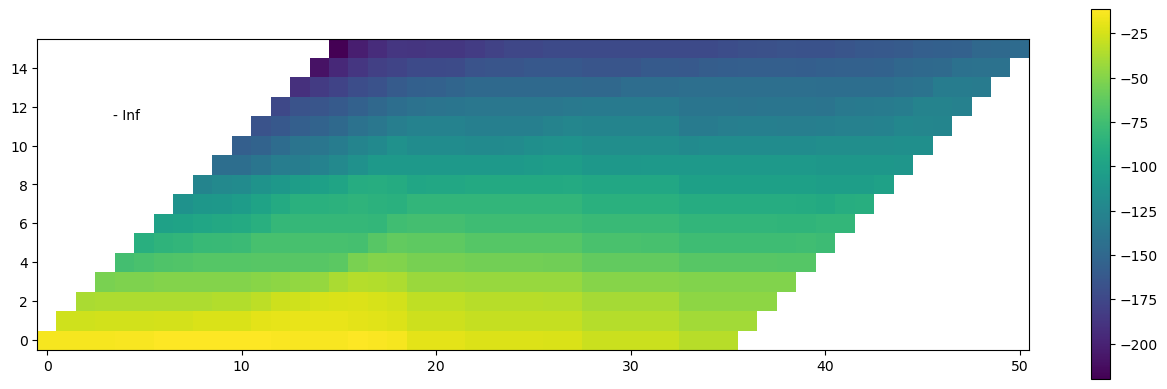

In [21]:
plt.imshow(trellis[1:, 1:].T, origin="lower")
plt.annotate("- Inf", (trellis.size(1) / 5, trellis.size(1) / 1.5))
plt.colorbar()
plt.show()